## Titanic machine learning project.....
procedures:
1.conducting Exploratory Data Analyses
2.Feature engineeering/visualization
3.Model building
4.Testinmg the accuracy of your model 
5.Submission

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#loading data sets
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [6]:
print(titanic_train.head())
print(titanic_test.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [7]:
print(titanic_train.describe())
print(titanic_test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [8]:
print(titanic_test.info)
print(titanic_train.info)
print(titanic_train.dtypes)

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [9]:
#checing for the null value in our dataset
print(titanic_test.isnull().sum())
print(titanic_train.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
#filling our null values wiht the value of the mean for the age column
titanic_train.fillna(titanic_train['Age'].mean(),inplace=True)
print(titanic_train.isnull().sum())
titanic_test.fillna(titanic_test['Age'].mean(),inplace=True)
print(titanic_test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [11]:
#filling/dropping the missing value with setting threshold
titanic_train.drop('Cabin',axis=1)
titanic_test.drop('Cabin',axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [12]:
print(titanic_train.head())
print(titanic_test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  29.6991        S  
1      0          PC 17599  71.2833      C85        C  
2      0  STON/O2. 3101282   7.9250  29.6991        S  
3      0            113803  53.1000     C123        S  
4      0            373450   8.0500  29.

skew is: 0.4785234382949897


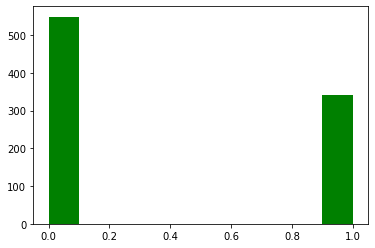

In [13]:
#checking for skewness in the survive column
print('skew is:',titanic_train.Survived.skew())
plt.hist(titanic_train.Survived,color='green')
plt.show()



In [14]:
#using dataframe.corr() method displays the correlation or relationship btw the columns.
corr = titanic_train.corr()
print(corr['Survived'].sort_values(ascending=False)[:5],'\n')
print(corr['Survived'].sort_values(ascending=False)[-5:])
#interpretation: its shows that the first five features are the most positively correlated with survived 
#while the next five are the most negatively correlated.

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Name: Survived, dtype: float64 

Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Pclass        -0.338481
Name: Survived, dtype: float64


In [24]:
#creating a pivot table on each most correlated variable to check for other imprtant variable
surv_pivot = quality_pivot = titanic_train.pivot_table(index='Fare',values='Survived',aggfunc=np.median)

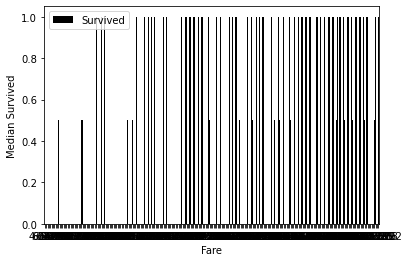

In [23]:
#we can create a more bar plot using the series.plot() method to help visualise the pivot table
quality_pivot.plot(kind='bar',color='black')
plt.xlabel('Fare')
plt.ylabel('Median Survived')
plt.xticks(rotation=0)
plt.show()

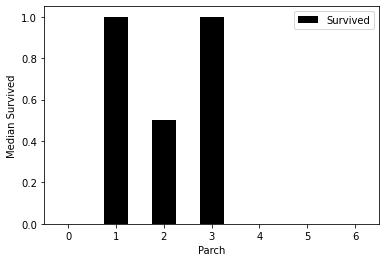

In [25]:
#creating a pivot table on each most correlated variable to check for other imprtant variable
surv_pivot = quality_pivot = titanic_train.pivot_table(index='Parch',values='Survived',aggfunc=np.median)
#we can create a more bar plot using the series.plot() method to help visualise the pivot table
quality_pivot.plot(kind='bar',color='black')
plt.xlabel('Parch')
plt.ylabel('Median Survived')
plt.xticks(rotation=0)
plt.show()

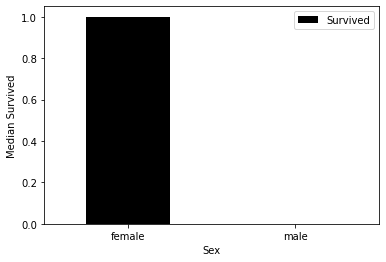

In [27]:
#creating a pivot table on each most correlated variable to check for other imprtant variable
surv_pivot = quality_pivot = titanic_train.pivot_table(index='Sex',values='Survived',aggfunc=np.median)
surv_pivot
#we can create a more bar plot using the series.plot() method to help visualise the pivot table
quality_pivot.plot(kind='bar',color='black')
plt.xlabel('Sex')
plt.ylabel('Median Survived')
plt.xticks(rotation=0)
plt.show()